### Project 2 - Customer Service Request Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the CSV file
nyc = pd.read_csv('C:\\Sachin new\\Simplilearn\\Course 2 - Applied DS with Python\\Project 2\\311_Service_Requests_from_2010_to_Present.csv')

C:\Users\14sac\AppData\Local\Temp\ipykernel_24544\3510675285.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc = pd.read_csv('C:\\Sachin new\\Simplilearn\\Course 2 - Applied DS with Python\\Project 2\\311_Service_Requests_from_2010_to_Present.csv')


In [3]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 1. Understanding the dataset

In [4]:
# Identify the shape of the dataset

nyc.shape

(364558, 53)

In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
# Identifying the variables with null values

nyc.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### 2. Basic Exploratory Data Analysis

In [7]:
# Finding out the number of rows for each of the categorical values:
# no. of rows for each value of Agency

nyc['Agency'].value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [8]:
nyc['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [9]:
nyc['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


In [10]:
#to find out different types of descriptor for each compliant type

pd.crosstab(index = nyc['Complaint Type'], columns = nyc['Descriptor'])

Descriptor,After Hours - Licensed Est,Animal Waste,Banging/Pounding,Blocked Hydrant,Blocked Sidewalk,Building,Car/Truck Horn,Car/Truck Music,Chained,Chronic Speeding,...,Police Report Not Requested,Police Report Requested,Posted Parking Sign Violation,Tortured,Truck Route Violation,Unauthorized Bus Layover,Underage - Licensed Est,Unlicensed,Vehicle,With License Plate
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animal Abuse,0,0,0,0,0,0,0,0,695,0,...,0,0,0,1041,0,0,0,0,0,0
Animal in a Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Derelict Vehicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21661
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drinking,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,345,0,0,0
Ferry Complaint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,...,35,122,0,0,0,0,0,0,0,0


In [ ]:
# 1. Utilize missing value treatment

In [11]:
nyc['Facility Type'].value_counts()

Precinct    362169
Name: Facility Type, dtype: int64

In [12]:
# There are 2389 missing values for 'Facility Type'.
# Since the facility type is 'Precinct' for most of the cases, the missing values are utilised by updating the missing values
# by 'Precinct'

nyc['Facility Type'].fillna(value = 'Precinct',inplace = True)

In [13]:
# Now there are no missing values in 'Facility Type'
nyc.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                          0
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [ ]:
# 2. Analyze the date column and remove the entries if it has an incorrect timeline

In [15]:
# To convert 'Created Date' and 'Closed Date' in datetime format

nyc['Created Date']=pd.to_datetime(nyc['Created Date'])
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])

In [48]:
# to convert date and time into date only

nyc['Create_date1']=nyc['Created Date'].dt.date

In [49]:
# to check outliers in the date column using Boxplot graph

nyc['Create_date1'].describe()

count         364558
unique           365
top       2015-05-10
freq            1540
Name: Create_date1, dtype: object

In [50]:
nyc['Create_date1'].min()

datetime.date(2015, 1, 1)

In [51]:
nyc['Create_date1'].max()

datetime.date(2015, 12, 31)

<AxesSubplot:>

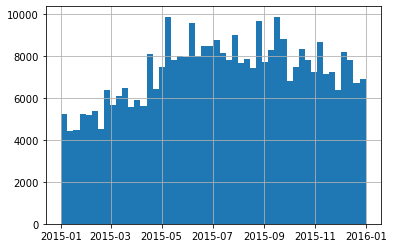

In [52]:
nyc['Create_date1'].hist(bins=50)

In [54]:
# since the dates are within one year period, there are no outliers observed in the dataset.

# we can also checked with the response time, whether there are any outliers in the dates.

In [55]:
nyc['Created Date'].value_counts()

2015-02-11 22:56:36    3
2015-08-15 22:49:03    3
2015-06-03 22:16:23    3
2015-05-09 21:32:57    3
2015-09-10 21:19:51    3
                      ..
2015-09-07 14:12:47    1
2015-09-07 14:16:39    1
2015-09-07 14:18:47    1
2015-09-07 14:19:56    1
2015-01-01 00:00:50    1
Name: Created Date, Length: 362018, dtype: int64

In [56]:
nyc['Closed Date'].value_counts()

2015-09-10 07:12:49    3
2015-07-11 05:58:23    2
2015-04-08 05:29:52    2
2015-05-17 18:21:40    2
2015-10-17 03:46:25    2
                      ..
2015-09-05 05:16:07    1
2015-09-05 04:55:08    1
2015-09-05 05:34:52    1
2015-09-05 07:31:42    1
2015-01-01 02:42:22    1
Name: Closed Date, Length: 339837, dtype: int64

In [57]:
# Response time is calculated, which is equal to 'Closed Date' - 'Created Date'
# Response time in timestamp

nyc['response_time'] = nyc['Closed Date'] - nyc['Created Date']

In [58]:
nyc['response_time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: response_time, Length: 364558, dtype: timedelta64[ns]

In [59]:
nyc['response_time'].describe()

count                       362177
mean     0 days 04:11:53.299632500
std      0 days 05:51:42.547519569
min                0 days 00:01:01
25%                0 days 01:15:33
50%                0 days 02:40:16
75%                0 days 05:14:38
max               24 days 16:52:22
Name: response_time, dtype: object

In [60]:
# converting the response time in days
nyc['response_days']=nyc['response_time']/np.timedelta64(1,'D')

In [62]:
nyc['response_days']

0         0.038542
1         0.060567
2         0.202477
3         0.323229
4         0.144259
            ...   
364553    0.429016
364554    0.097616
364555    0.013229
364556    0.111725
364557    0.115972
Name: response_days, Length: 364558, dtype: float64

In [63]:
# converting the response time in hours
nyc['response_hours']=nyc['response_time']/np.timedelta64(1,'h')

In [64]:
nyc['response_hours']

0          0.925000
1          1.453611
2          4.859444
3          7.757500
4          3.462222
            ...    
364553    10.296389
364554     2.342778
364555     0.317500
364556     2.681389
364557     2.783333
Name: response_hours, Length: 364558, dtype: float64

<AxesSubplot:>

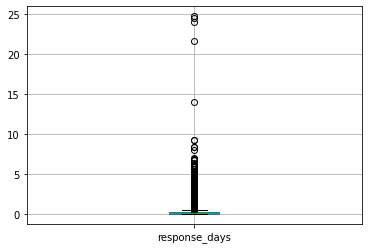

In [65]:
# to check outliers in the date columns using Boxplot graph

nyc.boxplot(column = 'response_days')

In [66]:
# to check distribution of values in response_days

nyc['response_days'].describe()

count    362177.000000
mean          0.174922
std           0.244242
min           0.000706
25%           0.052465
50%           0.111296
75%           0.218495
max          24.703032
Name: response_days, dtype: float64

In [68]:
# to check number of values in response_days above a particular threshold

nyc['response_days'].value_counts(bins=[0,5,10,15,20,25])

(-0.001, 5.0]    362118
(5.0, 10.0]          54
(20.0, 25.0]          4
(10.0, 15.0]          1
(15.0, 20.0]          0
Name: response_days, dtype: int64

In [69]:
# Since there are not many outliers in response time, it can be concluded that there are no outliers in the dates.

In [1]:
# 3. Draw a frequency plot for city-wise complaints

In [70]:
# To get the count of city wise complaints

nyc['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [71]:
import seaborn as sns

<AxesSubplot:xlabel='City', ylabel='count'>

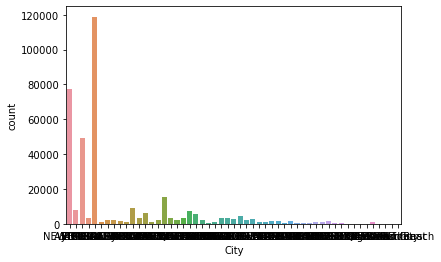

In [72]:
sns.countplot(x='City',data=nyc)

In [73]:
# since number of cities are many, drawing countplot for top 15 cities

top_15=nyc['City'].value_counts()[:15]
top_15

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
Name: City, dtype: int64

<AxesSubplot:>

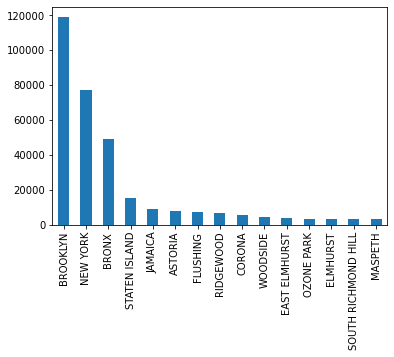

In [74]:
# Bar graph for top 15 cities

top_15.plot(kind='bar')

In [2]:
# 4. Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [75]:
brook=nyc[nyc['City']=='BROOKLYN']

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

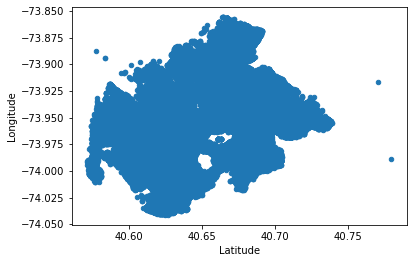

In [76]:
# scatter plot for complaint types in Brooklyn using Latitude and Longitude

brook[['Latitude','Longitude']].plot(kind='scatter',x='Latitude',y='Longitude')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

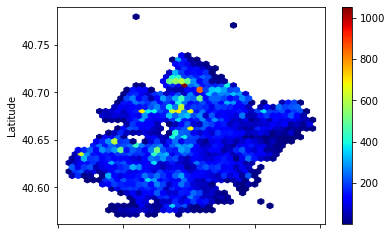

In [77]:
# Hexbin plot for complaint types in Brooklyn using Latitude and Longitude

brook.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1)

### 3. Find major types of complaints

### (a)	Plot a bar graph of count vs. complaint types

In [78]:

comp_type=nyc['Complaint Type'].value_counts()
comp_type

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<AxesSubplot:>

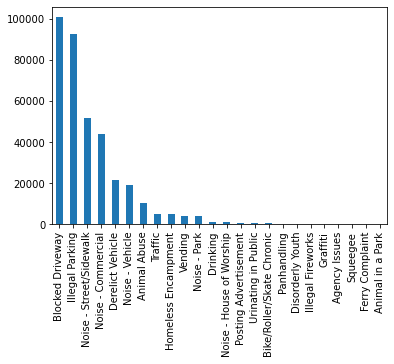

In [79]:
comp_type.plot(kind='bar')

### (b)	Find the top 10 types of complaints

In [80]:
comp_type[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

### (c) Display the types of complaints in each city in a separate dataset

In [81]:
# using crosstab method

city_comp_type=pd.crosstab(index=nyc['City'],columns=nyc['Complaint Type'])
city_comp_type

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17063,2403,66,206,15,275,24,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36447,6259,79,291,60,948,61,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,...,2,0,29,100,0,0,0,7,0,0


### 4. Visualize the major types of complaints in each city

In [82]:
comp_type

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

### 5. Check if the average response time across various types of complaints is different

In [83]:
# To check the response time (in hours) is different for various complaint types
# since there are more than 3 types of complaints, we shall use the ANOVA test to validate the average response time 
# for top 5 complaint types

In [84]:
# For complaint type = 'Blocked Driveway', we take the response hours in a new data frame
# since some complaints have not closed, the response time in hours is blank for those cases.
# The same has been removed using dropna() method

df1=nyc[nyc['Complaint Type']=='Blocked Driveway']['response_hours'].dropna()

In [85]:
df1

1         1.453611
2         4.859444
7         1.813611
9         1.395000
10        7.811111
            ...   
364548    2.563611
364549    1.161389
364550    5.976389
364556    2.681389
364557    2.783333
Name: response_hours, Length: 100624, dtype: float64

In [86]:
# For complaint type = 'Illegal Parking', we take the response hours in a new data frame

df2=nyc[nyc['Complaint Type']=='Illegal Parking']['response_hours'].dropna()

In [87]:
# For complaint type = 'Noise - Street/Sidewalk', we take the response hours in a new data frame

df3=nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']['response_hours'].dropna()

In [88]:
# For complaint type = 'Noise - Commercial', we take the response hours in a new data frame

df4=nyc[nyc['Complaint Type']=='Noise - Commercial']['response_hours'].dropna()

In [89]:
# For complaint type = 'Derelict Vehicle', we take the response hours in a new data frame

df5=nyc[nyc['Complaint Type']=='Derelict Vehicle']['response_hours'].dropna()

In [90]:
# Under the ANOVA test:

# H0: the average response time is the same across different complaint types
# Ha: the average response time is different

In [91]:
from scipy import stats

In [92]:
# Using one way ANOVA test

stats.f_oneway(df1,df2,df3,df4,df5)

F_onewayResult(statistic=2012.0389087633791, pvalue=0.0)

In [93]:
# Alpha is assumed at 5%

# p value = 0.0

# Since P value is less than Alpha (p < alpha), we shall reject the H0. 
# i.e. the average response time across types of complaints is different


### 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [ ]:
# Chisquare test is carried out to check the relationship between two variables.
# Let us check the relationship between 'city' and 'complaint types'
# considering that there are many cities, we shall check the relationship between top 5 cities w.r.t. number of complaints

In [95]:
top5_city = nyc['City'].value_counts()[:5]
top5_city

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
Name: City, dtype: int64

In [96]:
# To create a separate dataframe with top 5 cities

df_top5city=nyc[nyc['City'].isin(top5_city.index)]
df_top5city

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Create_date1,response_time,response_days,response_hours
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",2015-12-31,0 days 00:55:30,0.038542,0.925000
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",2015-12-31,0 days 04:51:34,0.202477,4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",2015-12-31,0 days 07:45:27,0.323229,7.757500
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",2015-12-31,0 days 01:53:41,0.078947,1.894722
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",2015-12-31,0 days 01:58:22,0.082199,1.972778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364551,29607567,2015-01-01 00:06:02,2015-01-01 00:43:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10453.0,NaN,...,NaN,NaN,NaN,40.848639,-73.911679,"(40.84863947227845, -73.91167941229558)",2015-01-01,0 days 00:37:39,0.026146,0.627500
364552,29610051,2015-01-01 00:05:05,2015-01-01 01:22:10,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10002.0,NaN,...,NaN,NaN,NaN,40.721235,-73.987770,"(40.72123468734571, -73.98777023226815)",2015-01-01,0 days 01:17:05,0.053530,1.284722
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",2015-01-01,0 days 02:20:34,0.097616,2.342778
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",2015-01-01,0 days 00:19:03,0.013229,0.317500


In [106]:
# to get a count of complaint types for the top 5 cities

city_comp_top5=pd.crosstab(index=df_top5city['City'],columns=df_top5city['Complaint Type'])
city_comp_top5

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
BRONX,1971,22,17063,2403,66,206,15,275,24,9889,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,124,36447,6259,79,291,60,948,61,33533,...,389,1575,13984,5966,49,58,0,1258,155,575
JAMAICA,317,3,3621,1133,9,40,3,93,4,1698,...,15,38,365,337,3,8,0,632,37,24
NEW YORK,1941,254,2707,695,81,321,25,3060,38,14553,...,222,1244,22252,6295,206,49,4,1770,264,2639
STATEN ISLAND,786,10,2845,2184,25,188,6,77,11,6224,...,18,67,888,424,13,517,0,229,19,25


In [99]:
# To validate using chi-square test, the relationship between cities and complaint types

# h0: there is no relationship between city and complaint type
# ha: there is a relationship between city and complaint type

In [107]:
from scipy.stats import chi2_contingency

In [108]:
chi_square_stat,pval,deg_freedom,exp_value=chi2_contingency(city_comp_top5)

In [109]:
chi_square_stat

69088.72108304541

In [110]:
pval

0.0

In [111]:
deg_freedom

80

In [112]:
exp_value

array([[1.49655706e+03, 7.53202617e+01, 1.14317190e+04, 2.31140193e+03,
        4.74171139e+01, 1.90762697e+02, 1.98787131e+01, 8.12109262e+02,
        2.51675451e+01, 1.20178675e+04, 6.71736368e+03, 1.33862160e+02,
        6.33200844e+02, 8.50498887e+03, 3.02338813e+03, 5.30706929e+01,
        1.18542785e+02, 7.29494060e-01, 7.87124091e+02, 9.64755894e+01,
        6.74052512e+02],
       [3.61765605e+03, 1.82073111e+02, 2.76341134e+04, 5.58739615e+03,
        1.14622298e+02, 4.61134320e+02, 4.80531940e+01, 1.96312727e+03,
        6.08379887e+01, 2.90510213e+04, 1.62380119e+04, 3.23587563e+02,
        1.53064853e+03, 2.05592725e+04, 7.30849403e+03, 1.28288802e+02,
        2.86555744e+02, 1.76341996e+00, 1.90273014e+03, 2.33212290e+02,
        1.62940005e+03],
       [2.71852265e+02, 1.36820601e+01, 2.07659219e+03, 4.19870290e+02,
        8.61340346e+00, 3.46523847e+01, 3.61100376e+00, 1.47521098e+02,
        4.57172953e+00, 2.18306711e+03, 1.22022111e+03, 2.43163005e+01,
        1.1502

In [113]:
# Alpha = 5% i.e. 0.05
# Since P-value 0.0 is lower than Alpha 0.05, we reject the null hypothesis H0

# Therefore, there is a relationship between city and complaint types.